In [1]:
import numpy as np

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv('D:\\2018-0101-2024-05-29_135856_BTCUSDT_15m_klines.csv')

In [4]:
data = pd.read_csv('D:\\2018-0101-2024-05-29_135856_BTCUSDT_15m_klines.csv')

In [5]:
# Combine bid and ask data for simplicity, and convert to numpy array
#Open,High,Low,Close
features = data[['Open', 'High', 'Low', 'Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Split the data into training and test sets
train_size = int(len(scaled_features) * 0.8)
train_data = scaled_features[:train_size]
test_data = scaled_features[train_size:]

# Convert the data into sequences suitable for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 1):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 0])  # Predict the future price based on past prices
    return np.array(X), np.array(y)

seq_length = 50  # Example sequence length
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [6]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 4)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            11000     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31251 (122.07 KB)
Trainable params: 31251 (122.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
5592/5592 [==============================] - 209s 35ms/step - loss: 6.8750e-05 - val_loss: 4.7923e-06
Epoch 2/20
5592/5592 [==============================] - 204s 36ms/step - loss: 5.6873e-06 - val_loss: 8.5539e-07
Epoch 3/20
5592/5592 [==============================] - 198s 35ms/step - loss: 2.1777e-06 - val_loss: 1.8539e-07
Epoch 4/20
5592/5592 [==============================] - 196s 35ms/step - loss: 1.3259e-06 - val_loss: 1.9039e-06
Epoch 5/20
5592/5592 [==============================] - 194s 35ms/step - loss: 9.5459e-07 - val_loss: 1.4051e-05
Epoch 6/20
5592/5592 [==============================] - 194s 35ms/step - loss: 9.2207e-07 - val_loss: 8.4298e-07
Epoch 7/20
5592/5592 [==============================] - 194s 35ms/step - loss: 8.9966e-07 - val_loss: 7.6704e-07
Epoch 8/20
5592/5592 [==============================] - 211s 38ms/step - loss: 8.3975e-07 - val_loss: 1.7836e-07
Epoch 9/20
5592/5592 [==============================] - 188s 34ms/step - loss: 6.9294e-07 - val_

In [24]:
predictions = model.predict(X_test)




1397/1397 [==============================] - 17s 12ms/step


In [25]:
predictions = scaler.inverse_transform(np.hstack((predictions, np.zeros((predictions.shape[0], 3)))))[:, 0]  # Inverse scaling

In [26]:
print(test_data[seq_length:, 1].reshape(-1, 1))

[[0.26294017]
 [0.26265959]
 [0.2629093 ]
 ...
 [0.92876754]
 [0.92776743]
 [0.92691094]]


In [27]:
scaled_test_data=test_data[seq_length:, 1].reshape(-1, 1)

In [28]:
predictions_extended = np.zeros((predictions.shape[0], 4))
print(predictions_extended)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [29]:
predictions_extended = np.zeros((predictions.shape[0], 4))

In [30]:
print(predictions_extended)
predictions_extended = np.zeros((predictions.shape[0], 4))
predictions_extended[:, 0] = predictions[0]  #

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [31]:
import matplotlib.pyplot as plt

In [31]:
import matplotlib.pyplot as plt

# import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(scaler.inverse_transform(test_data[seq_length:, 0].reshape(-1, 1)), color='blue', label='Actual BTC Price')
plt.plot(predictions, color='red', label='Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (3,) and (2,)

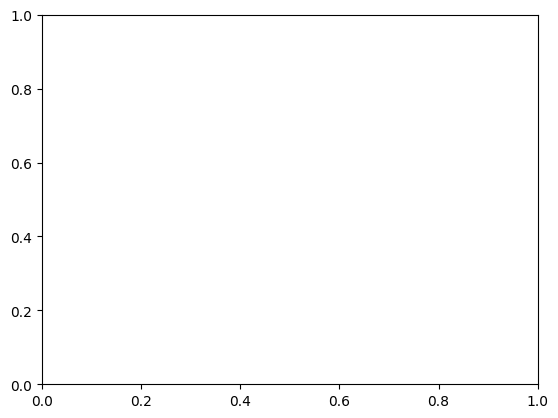

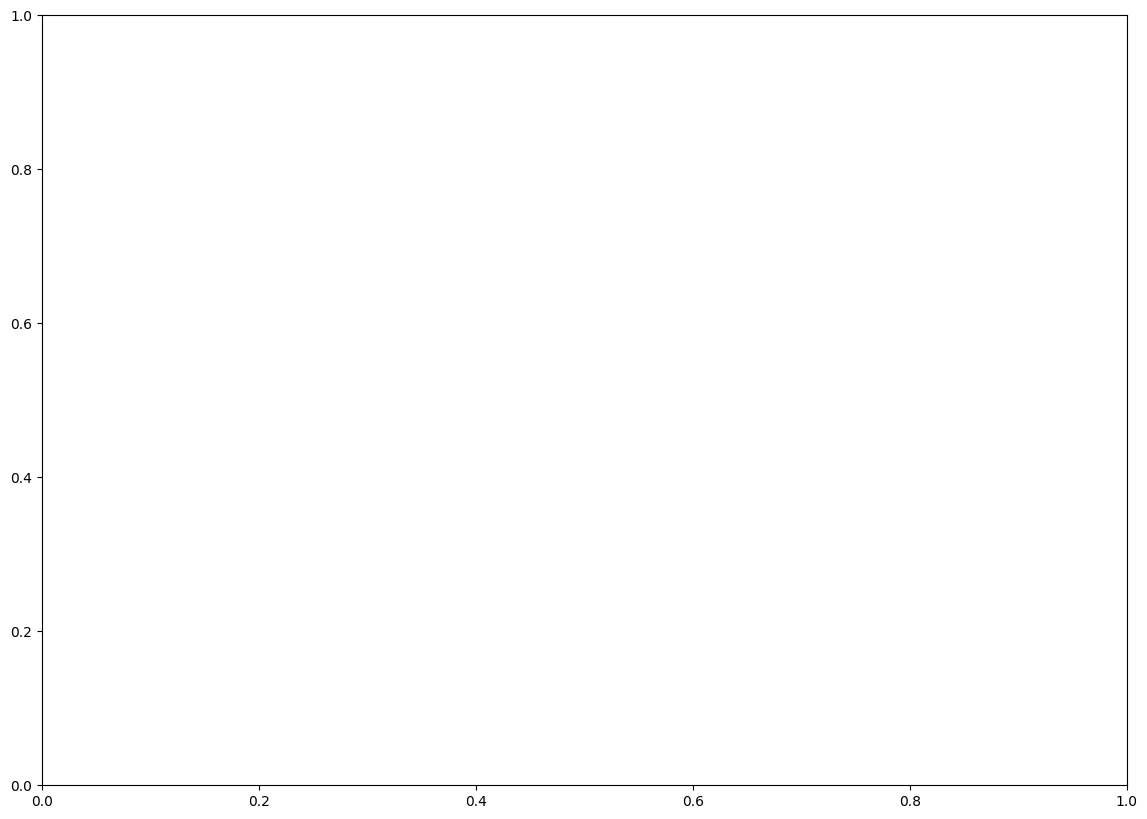

In [45]:
predictions_extended = np.zeros((predictions.shape[0], 4))
predictions_extended[:, 0] = predictions[:]  # Place predictions in the correct column

crude_test_data = features[train_size:]

# Inverse transform the predictions
inversed_predictions = scaler.inverse_transform(predictions_extended)[:, 0]

# Inverse transform the actual test data for comparison
test_data_extended = np.zeros((y_test.shape[0], 4))
test_data_extended[:, 0] = y_test
inversed_test_data = scaler.inverse_transform(test_data_extended)[:, 0]

num_x_lines = 10
num_y_lines = 10
x_range = (0, 10)
y_range = (0, 20000,1000)

# Generate the grid lines
x_lines = np.linspace(x_range[0], x_range[1], num_x_lines)
y_lines = np.linspace(y_range[0], y_range[1], num_y_lines)

# Create a figure and axis
fig, ax = plt.subplots()



# Plot the results
plt.figure(figsize=(14, 10))
plt.plot(y_range, [x, x], color='black', linestyle='-', linewidth=0.5)
#plt.plot(crude_test_data[:,3], color='blue', label='Actual LTC Price')
plt.plot(predictions[:10], color='green', label='Predicted LTC Price')
#plt.plot(data['Open'][:1400], color='lime', label='Open LTC Price',)
plt.plot(data['Open'][len(data) - len(predictions):len(data) - len(predictions)+10].values, color='lime', label='Close LTC Price',)
#plt.plot(crude_test_data[:,2], color='red', label='Hight LTC Price',)
#plt.plot(first_column[:,3], color='blue', label='Close LTC Price',)
plt.title('LTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [81]:
print(type(X_test))

<class 'numpy.ndarray'>


In [29]:
import numpy as np

# Create a 10x5 array with random values
array = X_test

# Check if the array is a NumPy array
print(type(array))  # Should print <class 'numpy.ndarray'>

# Check the shape of the array
print(array.shape)  # Should print (10, 5)

# Select the first column (index 0)
first_column = array[:, 0]

print(array)

# Print the first column
print("First column:")
print(first_column)


<class 'numpy.ndarray'>
(1596, 10, 4)
[[[0.61906924 0.60844485 0.64455175 0.61693915]
  [0.61702611 0.60636825 0.64035272 0.61307902]
  [0.61293984 0.60359945 0.63888306 0.60694823]
  ...
  [0.60136209 0.60544532 0.63111484 0.61557675]
  [0.615437   0.61675127 0.64728113 0.62170754]
  [0.62133939 0.61259806 0.64686122 0.61943688]]

 [[0.61702611 0.60636825 0.64035272 0.61307902]
  [0.61293984 0.60359945 0.63888306 0.60694823]
  [0.60681044 0.5971389  0.63447407 0.6030881 ]
  ...
  [0.615437   0.61675127 0.64728113 0.62170754]
  [0.62133939 0.61259806 0.64686122 0.61943688]
  [0.61929625 0.60821412 0.63804325 0.60762943]]

 [[0.61293984 0.60359945 0.63888306 0.60694823]
  [0.60681044 0.5971389  0.63447407 0.6030881 ]
  [0.60295119 0.60106138 0.63594373 0.60876476]
  ...
  [0.62133939 0.61259806 0.64686122 0.61943688]
  [0.61929625 0.60821412 0.63804325 0.60762943]
  [0.60749149 0.60059991 0.63552383 0.60331517]]

 ...

 [[0.58978434 0.58052607 0.61515851 0.58197094]
  [0.58183882 0.5768

In [28]:
print(X_test)
print(type(X_test))
first_column=X_test[:, 2]
second_column=X_test[:, 1]
print(first_column)
print("Second column:")
print(second_column)


[[[0.61906924 0.60844485 0.64455175 0.61693915]
  [0.61702611 0.60636825 0.64035272 0.61307902]
  [0.61293984 0.60359945 0.63888306 0.60694823]
  ...
  [0.60136209 0.60544532 0.63111484 0.61557675]
  [0.615437   0.61675127 0.64728113 0.62170754]
  [0.62133939 0.61259806 0.64686122 0.61943688]]

 [[0.61702611 0.60636825 0.64035272 0.61307902]
  [0.61293984 0.60359945 0.63888306 0.60694823]
  [0.60681044 0.5971389  0.63447407 0.6030881 ]
  ...
  [0.615437   0.61675127 0.64728113 0.62170754]
  [0.62133939 0.61259806 0.64686122 0.61943688]
  [0.61929625 0.60821412 0.63804325 0.60762943]]

 [[0.61293984 0.60359945 0.63888306 0.60694823]
  [0.60681044 0.5971389  0.63447407 0.6030881 ]
  [0.60295119 0.60106138 0.63594373 0.60876476]
  ...
  [0.62133939 0.61259806 0.64686122 0.61943688]
  [0.61929625 0.60821412 0.63804325 0.60762943]
  [0.60749149 0.60059991 0.63552383 0.60331517]]

 ...

 [[0.58978434 0.58052607 0.61515851 0.58197094]
  [0.58183882 0.57683433 0.61536847 0.58673933]
  [0.58660

In [77]:
from keras.layers import LSTM, Dense, Dropout
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [61]:
prices = data['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))
seq_length = 60  # Number of past days to use for predicting the future
X, y = create_sequences(scaled_prices, seq_length)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [62]:
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
200/200 [==============================] - 30s 82ms/step - loss: 0.0024
Epoch 2/50
200/200 [==============================] - 15s 73ms/step - loss: 5.7889e-04
Epoch 3/50
200/200 [==============================] - 15s 76ms/step - loss: 4.6526e-04
Epoch 4/50
200/200 [==============================] - 15s 75ms/step - loss: 3.7148e-04
Epoch 5/50
200/200 [==============================] - 10s 50ms/step - loss: 4.0123e-04
Epoch 6/50
200/200 [==============================] - 10s 49ms/step - loss: 3.4894e-04
Epoch 7/50
200/200 [==============================] - 14s 69ms/step - loss: 3.2537e-04
Epoch 8/50
200/200 [==============================] - 13s 67ms/step - loss: 3.3731e-04
Epoch 9/50
200/200 [==============================] - 9s 47ms/step - loss: 2.9439e-04
Epoch 10/50
200/200 [==============================] - 13s 64ms/step - loss: 3.1547e-04
Epoch 11/50
200/200 [==============================] - 14s 71ms/step - loss: 3.2272e-04
Epoch 12/50
200/200 [=========================

50/50 [==============================] - 3s 34ms/step


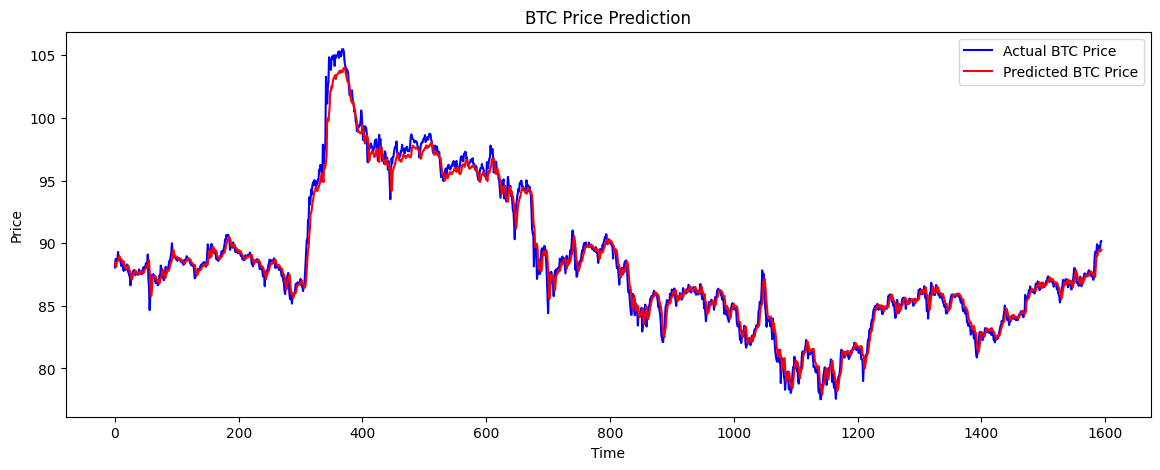

In [63]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)




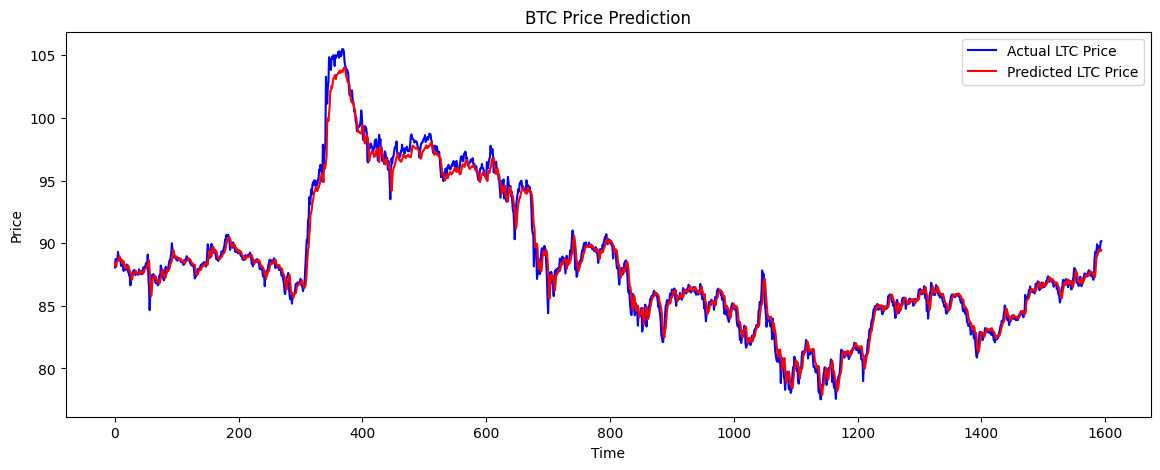

In [64]:
# Evaluate the model
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(data['Close'][len(data) - len(y_test):].values, color='blue', label='Actual LTC Price')
plt.plot(predictions, color='red', label='Predicted LTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [65]:
print(predictions)

[[88.38475]
 [88.1491 ]
 [88.09913]
 ...
 [89.50357]
 [89.37028]
 [89.45876]]


In [66]:
print(len(predictions))

1595


In [76]:
print(y_train.shape)


(6379,)


In [72]:
model.save('model.keras')